In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [3]:
%matplotlib inline

In [4]:
xmin = 0.
xmax = 30.
xn = 31
x = np.linspace(xmin,xmax,xn)

ymin = 0.
ymax = 30.
yn = 31
y = np.linspace(ymin,ymax,yn)

zmin = 0
zmax = 30
zn =  31
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z)
rho_m = np.ones((xn,yn,zn))*200.
rho_m[:,:,10:] = 1000.
rho_m[20:25,18:22,5:15] = 10.


In [5]:
xx,yy,zz,x1,y1,z1,rho = mf.select_area(17,28,16,25,0,20,x,y,z,rho_m)

In [6]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print lx,ly,lz

11 9 20


In [7]:
rho_sm = gaussian_filter(rho, sigma=1.)
rho_sm1 = np.ravel(rho_sm)

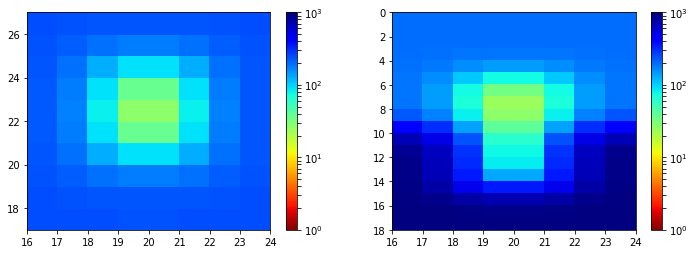

In [8]:
cmap = plt.cm.jet
cmap_r = mf.reverse_colourmap(cmap)

mx,my = np.meshgrid(y1,x1)
mx1,my1 = np.meshgrid(z1,y1)

cmap = plt.cm.jet
cmap_r = mf.reverse_colourmap(cmap)

z_plot = np.argmin(np.abs(z1-8))
x_plot = np.argmin(np.abs(x1-22))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pcolor(mx,my,rho_sm[:,:,z_plot],cmap=cmap_r,norm = LogNorm(vmin=1, vmax=1000))
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mx1,rho_sm[x_plot,:,:],cmap=cmap_r,norm = LogNorm(vmin=1, vmax=1000))
plt.ylim(18,0)
plt.colorbar()
plt.show()

In [64]:
# Control points

# index_x1 = np.arange(0,len(x1),1)
# index_y1 = np.arange(0,len(y1),1)
# index_z1 = np.arange(0,len(z1),1)

c1 = x1+.5
c2 = y1+.5
c3 = z1+.5



X,Y,Z = np.meshgrid(c1,c2,c3)

xc = np.ravel(X)
yc = np.ravel(Y)
zc = np.ravel(Z)

ln = xc.size

In [65]:
xc.size,yc.size,zc.size

(1980, 1980, 1980)

In [66]:
xx.size,yy.size,zz.size

(1980, 1980, 1980)

In [67]:
# Calculate interpolation function
t = 0.8
A = mf.calc_A_by_column(xx,yy,zz,xc,yc,zc,1,t)

In [68]:
H = np.dot(A.T,A)

In [69]:
h0 = np.trace(H)/ln

In [70]:
mu = 1E-8*h0
print mu

1.7144197512631078e-05


In [71]:
p = np.linalg.solve(H+(mu*np.identity(ln)),np.dot(A.T,rho_sm1))

In [72]:
rho_p = np.dot(A,p)
rho_p = rho_p.reshape((lx,ly,lz))
rho_p.shape

(11, 9, 20)

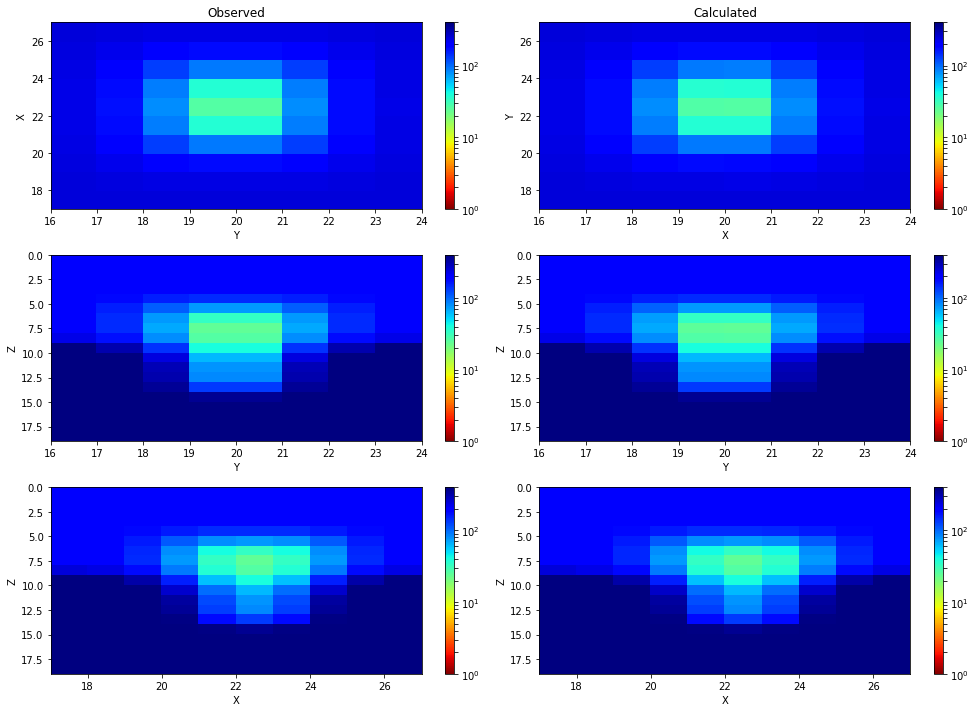

In [73]:
mf.plot_models_6sub(22,20,8,x1,y1,z1,x1,y1,z1,rho_sm,rho_p)

In [85]:
# Interpolation points

dx = np.max(x1) - np.min(x1)
dy = np.max(y1) - np.min(y1)
dz = np.max(z1) - np.min(z1)

lambx = 0.02*dx
lamby = 0.02*dy
lambz = 0.02*dz

xmin_cont = np.min(x1) - lambx
xmax_cont = np.max(x1) + lambx
ymin_cont = np.min(y1) - lamby
ymax_cont = np.max(y1) + lamby
zmin_cont = 0
zmax_cont = np.max(z1) + lambz

xn = 11
yn = 9
zn = 20

c1 = np.linspace(xmin_cont,xmax_cont,xn)
c2 = np.linspace(ymin_cont,ymax_cont,yn)
c3 = np.linspace(zmin_cont,zmax_cont,zn)

X,Y,Z = np.meshgrid(c1,c2,c3)

x0 = np.ravel(X)
y0 = np.ravel(Y)
z0 = np.ravel(Z)

In [86]:
x0.size,y0.size,z0.size

(1980, 1980, 1980)

In [87]:
xc.size,yc.size,zc.size

(1980, 1980, 1980)

In [88]:
t = 0.8

In [89]:
# Interpolate funtion rho in points x0, y0, z0

A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,1,t)

In [90]:
# Interpolated matrix
rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((xn,yn,zn))

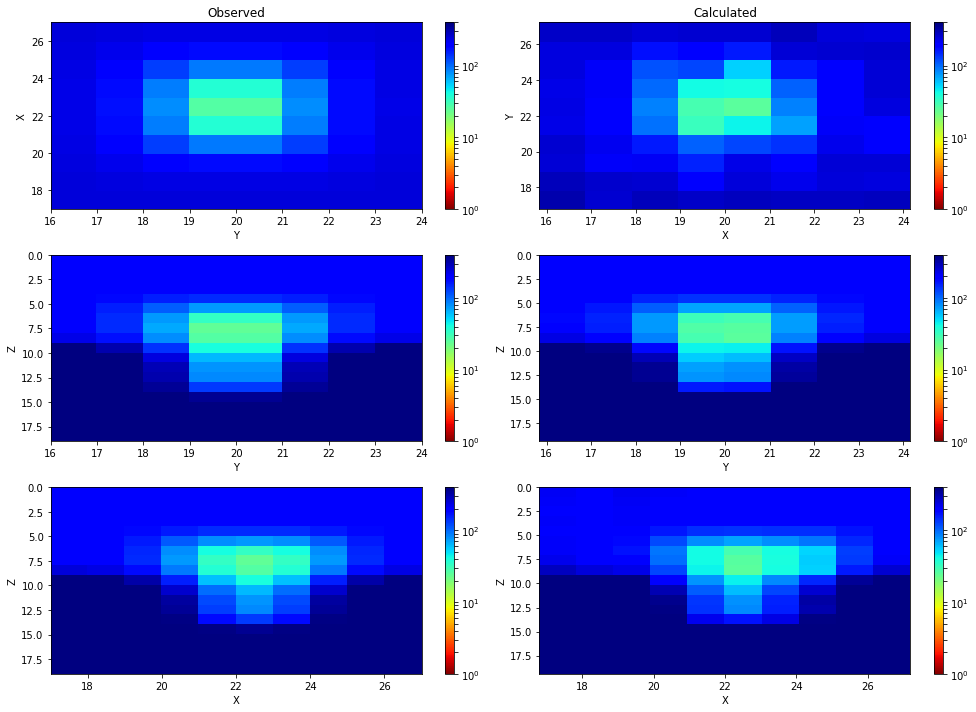

In [91]:
mf.plot_models_6sub(22,20,8,x1,y1,z1,c1,c2,c3,rho_sm,rho0_m)